<a href="https://colab.research.google.com/github/Sikandarh11/Feature-Engineering/blob/main/Outlier_Handling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv("/content/placement (1).csv")

In [5]:
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [4]:
df.describe()

,cgpa,placement_exam_marks,placed
count,1000.000000,1000.000000,1000.000000
mean,6.961240,32.225000,0.489000
std,0.615898,19.130822,0.500129
min,4.890000,0.000000,0.000000
25%,6.550000,17.000000,0.000000
50%,6.960000,28.000000,0.000000
75%,7.370000,44.000000,1.000000
max,9.120000,100.000000,1.000000


<ipython-input-12-12af892c6905>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cgpa'])
<ipython-input-12-12af892c6905>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])


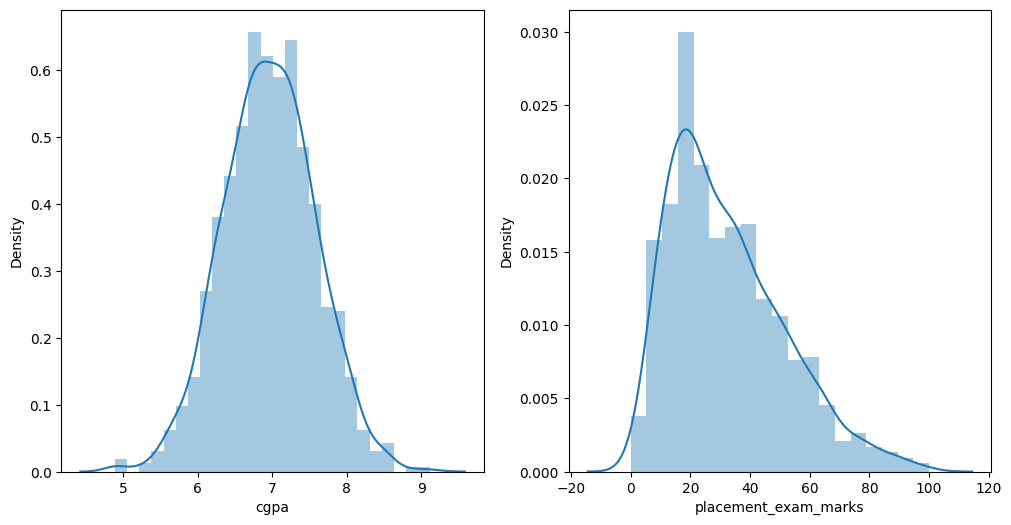

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
sns.distplot(df['cgpa'])

plt.subplot(1,2,2)
sns.distplot(df['placement_exam_marks'])
plt.show()

<Axes: ylabel='placement_exam_marks'>

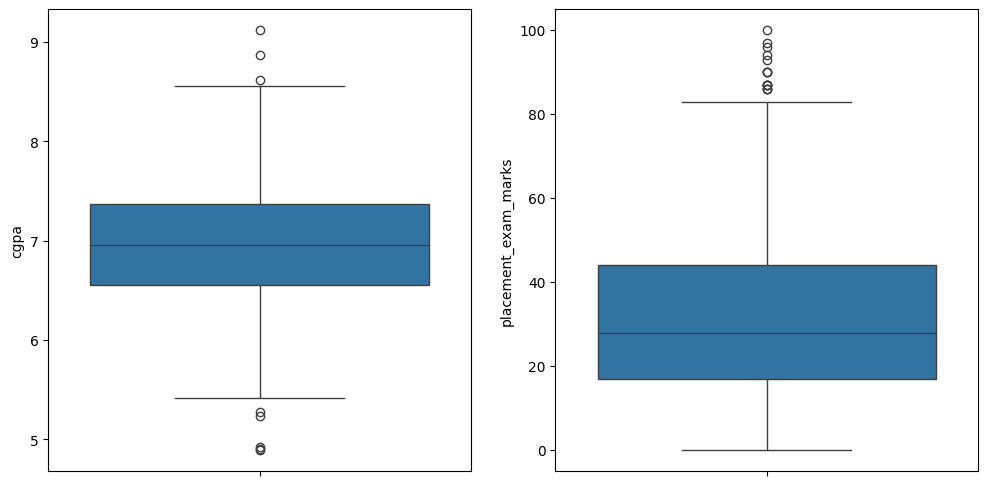

In [14]:
plt.figure(figsize=(12, 6))
plt.subplot(1,2, 1)
sns.boxplot(df['cgpa'])
plt.subplot(1,2,2)
sns.boxplot(df['placement_exam_marks'])

# **Dealing with Outliers using Boundry limits**

In [15]:
df['cgpa'].describe()

count    1000.000000
mean        6.961240
std         0.615898
min         4.890000
25%         6.550000
50%         6.960000
75%         7.370000
max         9.120000
Name: cgpa, dtype: float64

In [18]:
meanCgpa, stdCgpa = df['cgpa'].mean(), df['cgpa'].std()

In [19]:
meanCgpa, stdCgpa

(6.96124, 0.6158978751323896)

In [21]:
highest_b = meanCgpa+ 3*stdCgpa
lowest_b = meanCgpa - 3*stdCgpa
highest_b, lowest_b

(8.808933625397168, 5.113546374602832)

In [25]:
df[(df['cgpa'] > 8.8) | (df['cgpa'] < 5.11)]

cgpa  placement_exam_marks  placed
4.89  34.0                  0         1
4.90  10.0                  1         1
4.92  44.0                  1         1
8.87  44.0                  1         1
9.12  65.0                  1         1
dtype: int64

In [42]:
new_df = df[(df['cgpa'] < 8.6) & (df['cgpa'] > 5.5)]
new_df.shape

(989, 3)

<ipython-input-43-c4ff926e0fda>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['cgpa'])


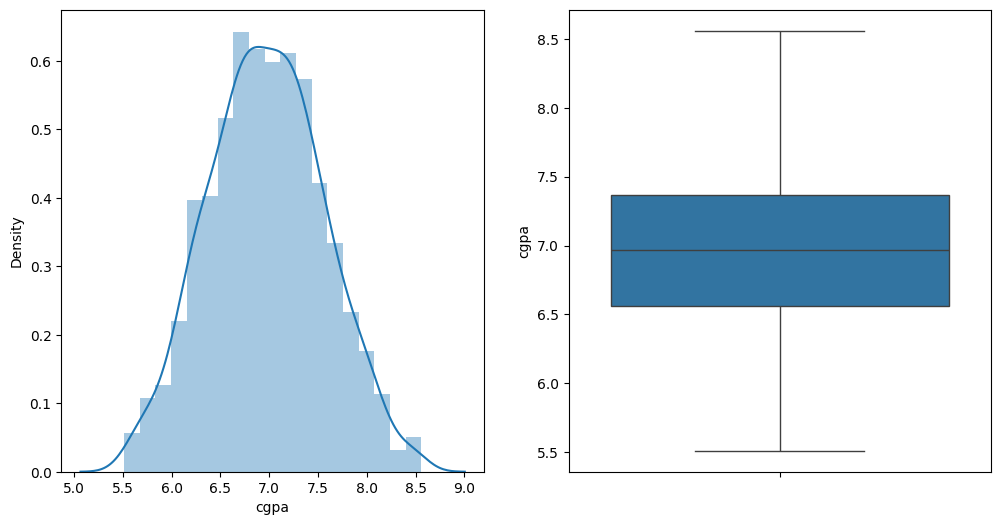

In [43]:
plt.figure(figsize = (12, 6))
plt.subplot(1,2,1)
sns.distplot(new_df['cgpa'])
plt.subplot(1,2,2)
sns.boxplot(new_df['cgpa'])
plt.show()

# **Another approach Z-score Normalization**

In [46]:
newdf2 = (df['cgpa'] - meanCgpa)/stdCgpa

In [53]:
newdf2[(newdf2 > 3) | (newdf2 <-3)]

485   -3.314251
995    3.099150
996    3.505062
997   -3.362960
999   -3.346724
Name: cgpa, dtype: float64

In [61]:
newdf2 = newdf2[(newdf2 < 3.5) & (newdf2 >-2.5)]
newdf2.shape

(992,)

<ipython-input-62-964792b9bd7d>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(newdf2)


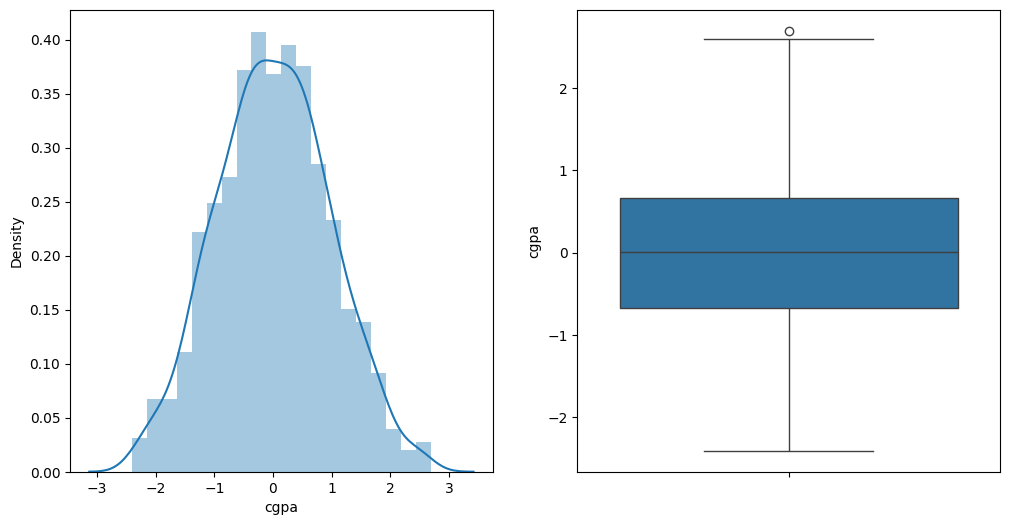

In [62]:
plt.figure(figsize = (12, 6))
plt.subplot(1,2,1)
sns.distplot(newdf2)
plt.subplot(1,2,2)
sns.boxplot(newdf2)
plt.show()

# **For Skewed Column**

As seem the column is right skewed so we use the IQR method for removing the outlier                                                                   
formula :
iqr = (75 - 25)persentile
upper_b = mean + iqr * 1.5
lower_b = mean - iqr *1.5


In [107]:
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

In [101]:
per75 = df['placement_exam_marks'].quantile(.75)
per25 = df['placement_exam_marks'].quantile(.25)
per75 , per25

(44.0, 17.0)

In [117]:
iqr = per75 - per25
up_lim = per75 + iqr*1.5
lo_lim = per25 - iqr*.5
up_lim, lo_lim

(84.5, 3.5)

In [130]:
pla_col = df['placement_exam_marks']
df_sk_re = pla_col[(df['placement_exam_marks'] < up_lim) &(df['placement_exam_marks'] > lo_lim)]
df_sk_re.shape, df.shape

((979,), (1000, 3))

<ipython-input-131-676ab4b58b77>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pla_col)
<ipython-input-131-676ab4b58b77>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_sk_re)


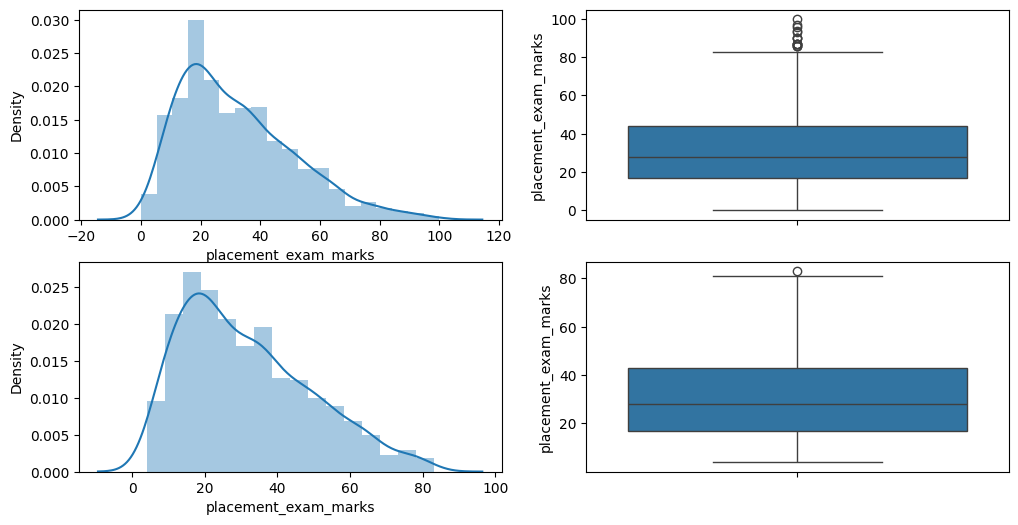

In [131]:
pla_col = df['placement_exam_marks']
plt.figure(figsize = (12, 6))

plt.subplot(2,2,1)
sns.distplot(pla_col)
plt.subplot(2,2,2)
sns.boxplot(pla_col)

plt.subplot(2,2,3)
sns.distplot(df_sk_re)
plt.subplot(2,2,4)
sns.boxplot(df_sk_re)

plt.show()

## **Another method is Capping**

In [63]:
highest_b = meanCgpa+ 3*stdCgpa
lowest_b = meanCgpa - 3*stdCgpa
highest_b, lowest_b

(8.808933625397168, 5.113546374602832)

In [71]:
df[(df['cgpa']>highest_b)  | (df['cgpa'] < lowest_b)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


In [83]:
df_cap = np.where((df['cgpa'] > highest_b), highest_b, df['cgpa'])
df_cap = np.where((df['cgpa'] < lowest_b), lowest_b, df_cap)
df_cap.shape

(1000,)

In [87]:
df_cap[(df_cap >highest_b)  | (df_cap< lowest_b)].sum()

0.0

<ipython-input-88-d6dae511ed51>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cap)


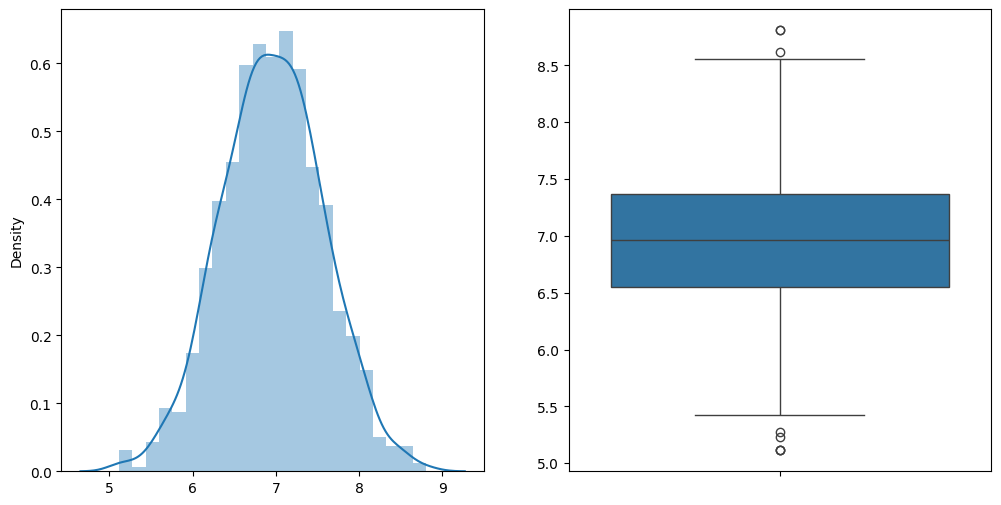

In [88]:
plt.figure(figsize = (12, 6))
plt.subplot(1,2,1)
sns.distplot(df_cap)
plt.subplot(1,2,2)
sns.boxplot(df_cap)
plt.show()

# **Dealing with column 2 which has right skewed data**

<ipython-input-90-8314b3d676b7>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pla_col)


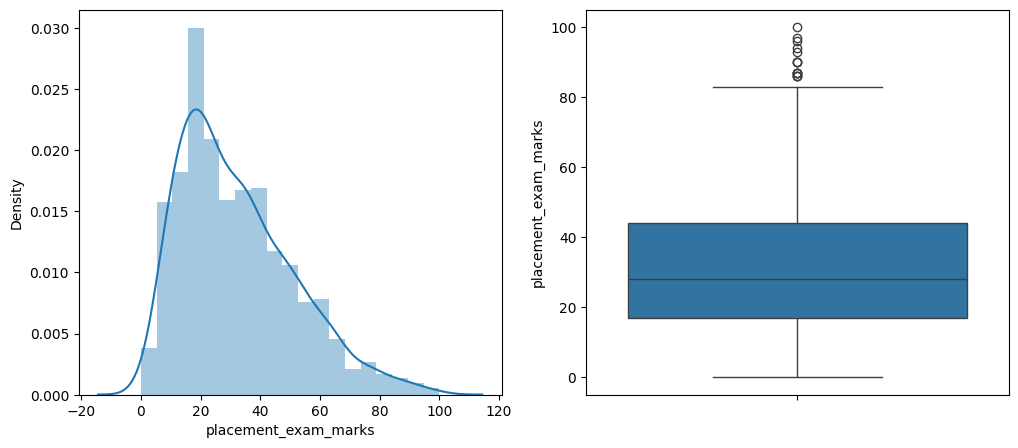

In [90]:
pla_col = df['placement_exam_marks']
plt.figure(figsize = (12, 5))
plt.subplot(1,2,1)
sns.distplot(pla_col)
plt.subplot(1,2,2)
sns.boxplot(pla_col)
plt.show()

As seem the column is right skewed so we use the IQR method for removing the outlier                                                                   
formula :
iqr = (75 - 25)persentile
upper_b = mean + iqr * 1.5
lower_b = mean - iqr *1.5

In [91]:
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

In [92]:
meanPla = df['placement_exam_marks'].mean()

In [96]:
per75 = df['placement_exam_marks'].quantile(.75)
per25 = df['placement_exam_marks'].quantile(.25)
per75 , per25

(44.0, 17.0)

In [97]:
iqr = per75 - per25

In [98]:
df_sk = np.where((df['placement_exam_marks'] > highest_b), highest_b, df['placement_exam_marks'])
df_sk = np.where((df['placement_exam_marks'] < lowest_b), lowest_b, df_sk)
df_sk.shape

(1000,)

<ipython-input-124-8cb1e5ceeacf>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_sk)
<ipython-input-124-8cb1e5ceeacf>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pla_col)


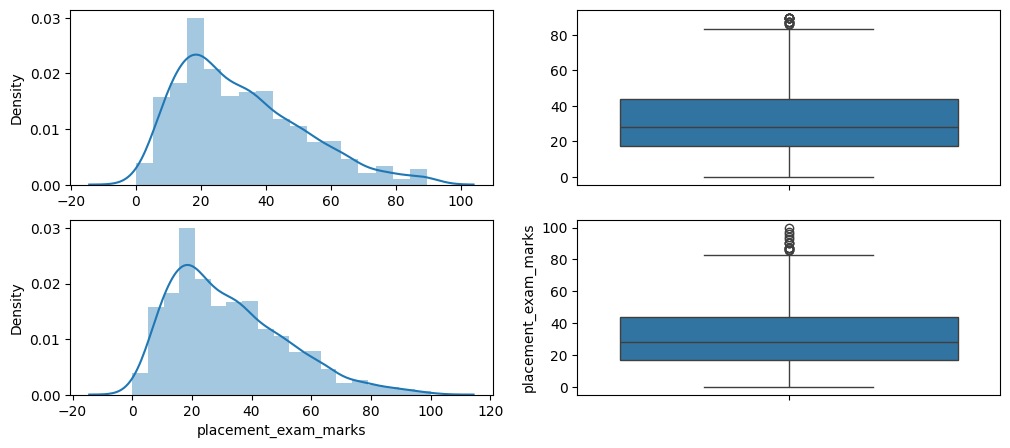

In [124]:
pla_col = df['placement_exam_marks']

plt.figure(figsize = (12, 5))
plt.subplot(2,2,1)
sns.distplot(df_sk)
plt.subplot(2,2,2)
sns.boxplot(df_sk)


plt.subplot(2,2,3)
sns.distplot(pla_col)
plt.subplot(2,2,4)
sns.boxplot(pla_col)





plt.show()